# 世界地图

导入模块。

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

读入内置世界地图。

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

去除南极洲。

In [3]:
world = world[world.continent != 'Antarctica']

更改投影。

In [4]:
world = world.to_crs("EPSG:3395")

C:\Users\ZHU\Anaconda3\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


查看数据。

In [5]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((20037508.343 -1800679.237, 200..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((3774143.866 -105050.440, 3792946.708..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-964649.018 3185897.152, -964597.245..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-13674486.249 6242596.000, -13..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-13674486.249 6242596.000, -13..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((2096126.508 5735055.661, 2096127.988..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((2234260.104 5220640.910, 2204305.520..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((2292095.761 5110826.439, 2284604.344..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-6866186.192 1196928.987, -6802177.4..."


初步查看地图。

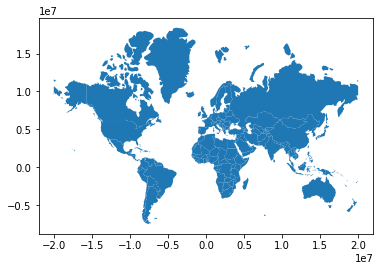

In [6]:
world.plot()

查看国家或地区列表。

In [7]:
np.unique(world.name)

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Rep.', 'Chad', 'Chile', 'China',
       'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark',
       'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador',
       'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.',
       'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Is

给国家或地区赋值，存入表格。

In [8]:
country_number = {'United States of America': 144060,
                  'Italy': 97689,
                  'Spain': 85199,
                  'China': 81470,
                  'Taiwan': 81470,
                  'Germany': 63929,
                  'Iran': 41495,
                  'France': 40174,
                  'United Kingdom': 22141,
                  'Switzerland': 15668,
                  'Belgium': 11899,
                  'Netherlands': 11750,
                  'South Korea': 9661,
                  'Canada': 6671,
                  'Norway': 4436,
                  'Brazil': 4330,
                  'Australia': 4247,
                  'Sweden': 4106,
                  'Japan': 1866,
                  'Russia': 1836,
                  }

df_country_number = pd.DataFrame(
    country_number.items(), columns=['name', 'number'])

数据表格和地理表格合并。

In [9]:
world = pd.merge(world, df_country_number, on='name', how='left')

填补空缺数字。

In [10]:
world['number'] = world['number'].fillna(0).astype('int')

绘图。

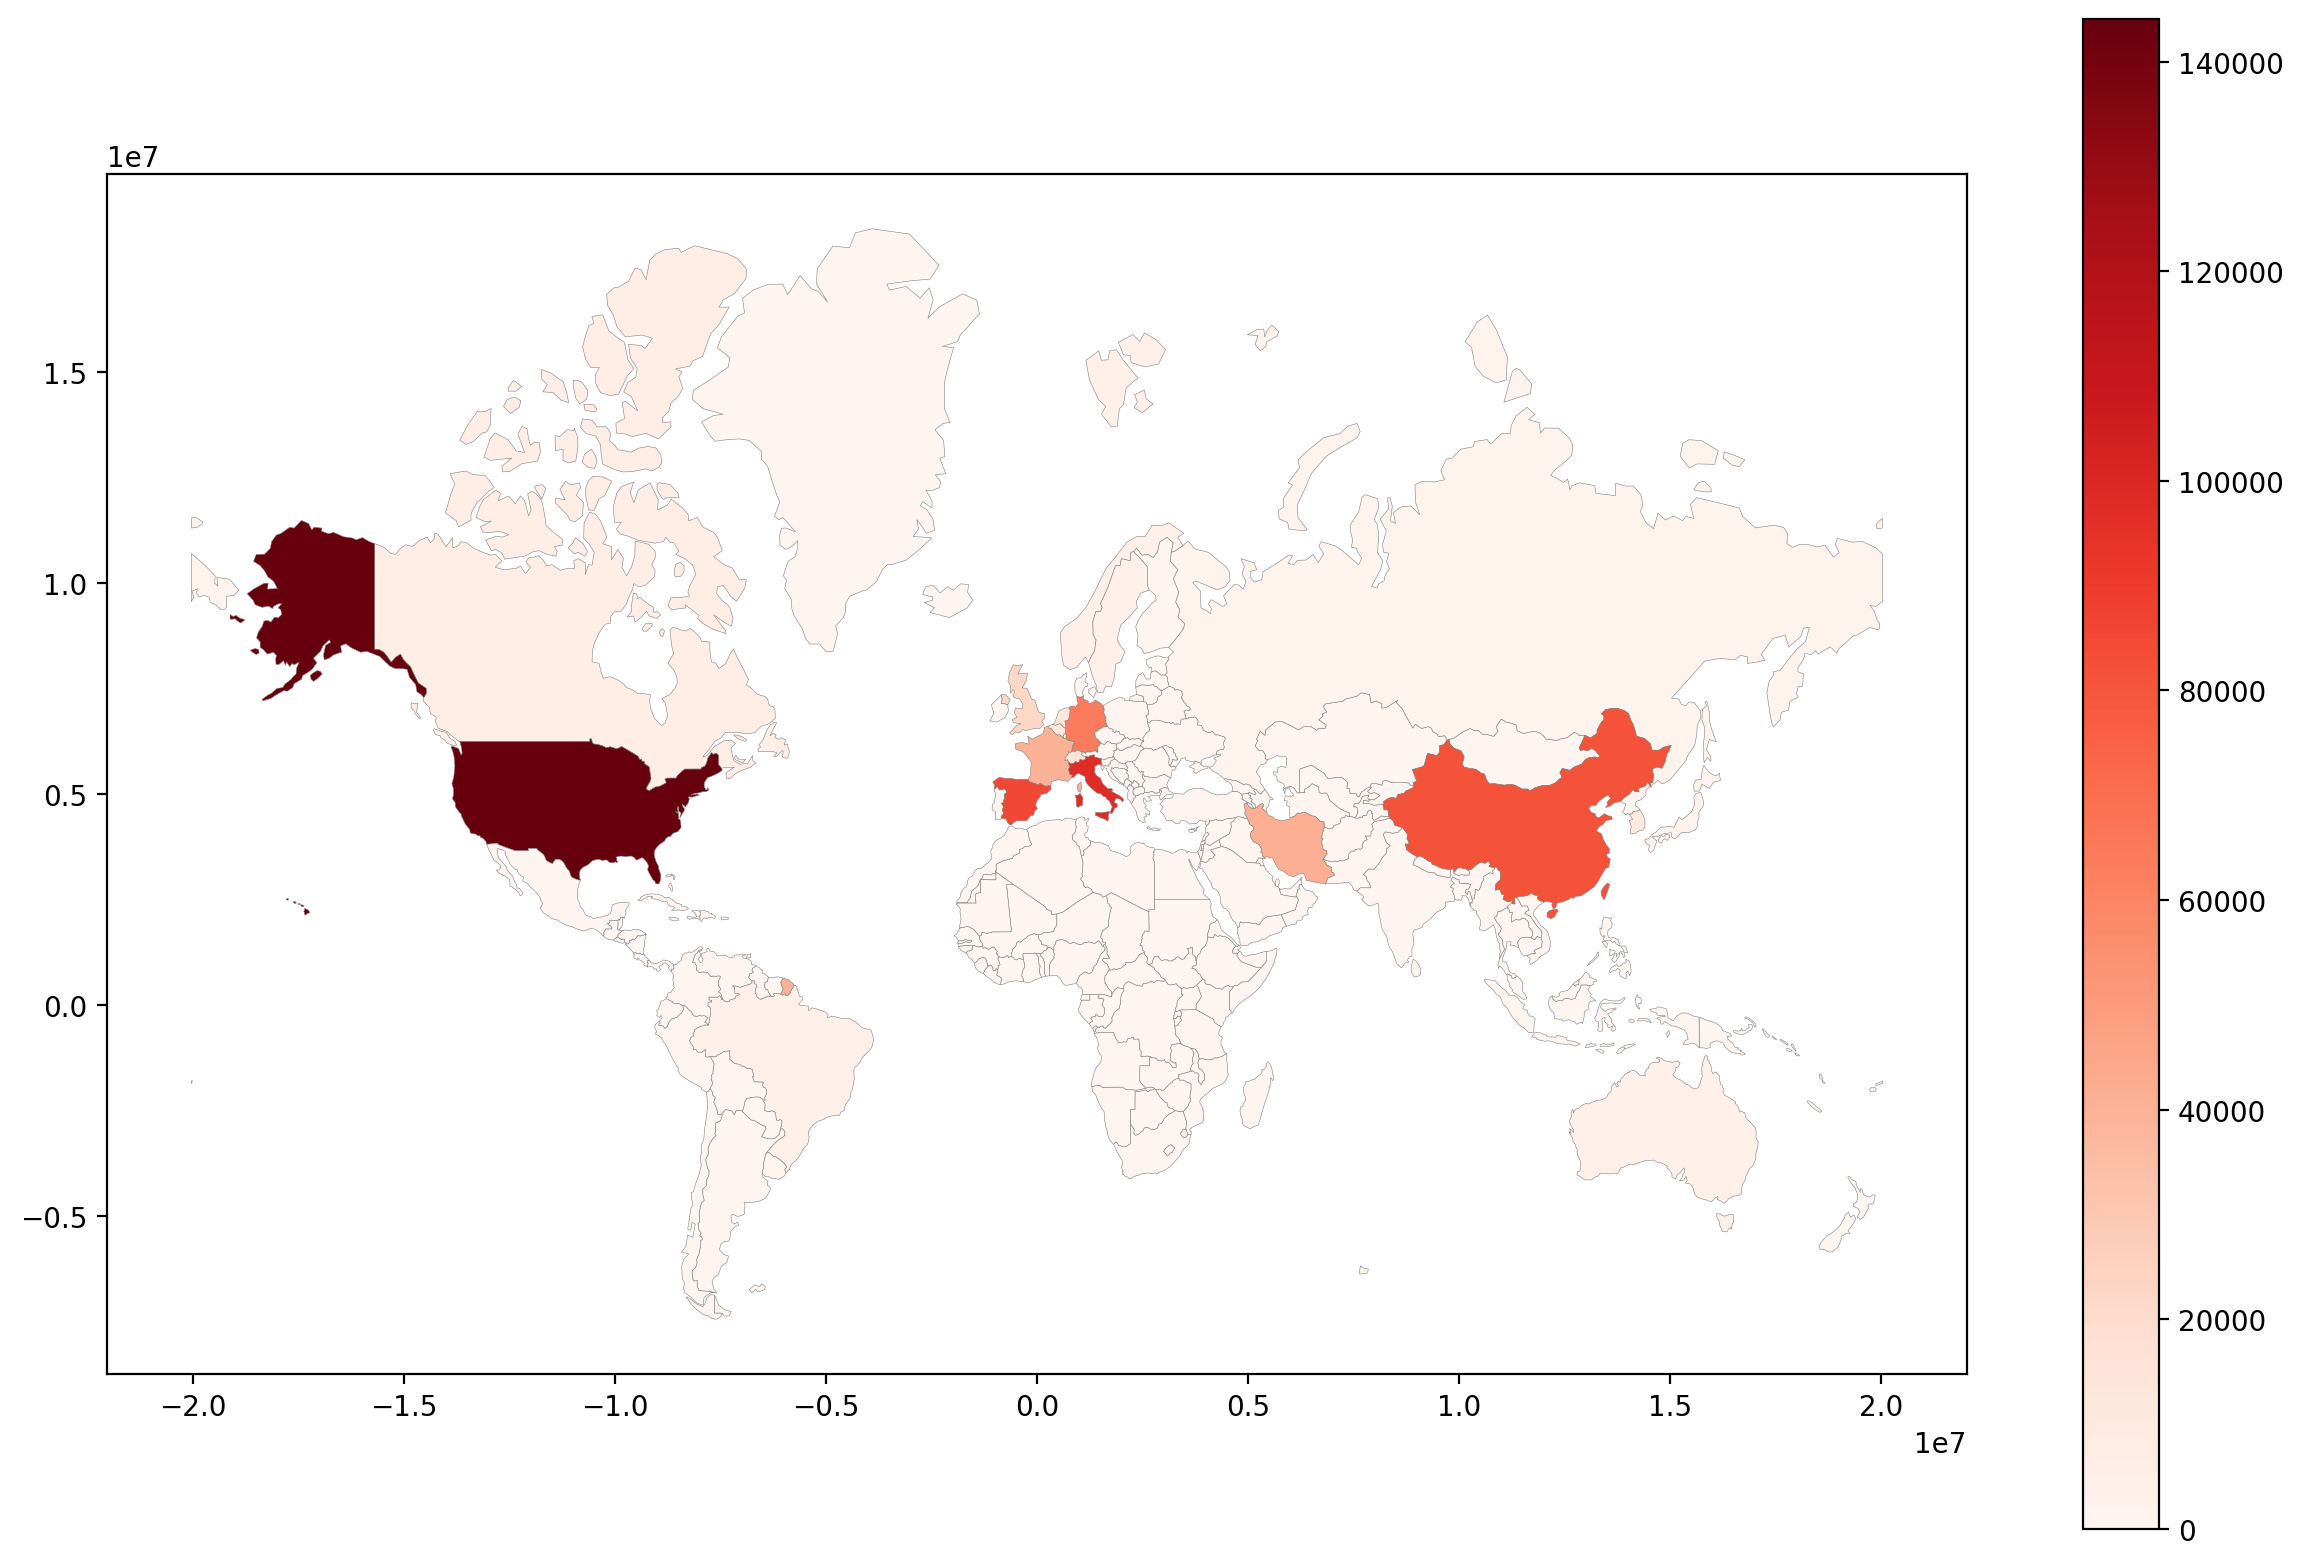

In [11]:
fig, ax = plt.subplots(figsize=(15, 10), dpi=200)
world.plot(ax=ax,
           linewidth=0.2, edgecolor='gray',
           column='number', cmap='Reds',
           legend=True)

去除边边框和坐标轴，加标题。

Text(0.5, 1, 'Confirmed cases of COVID-19 per selected country (20200330)')

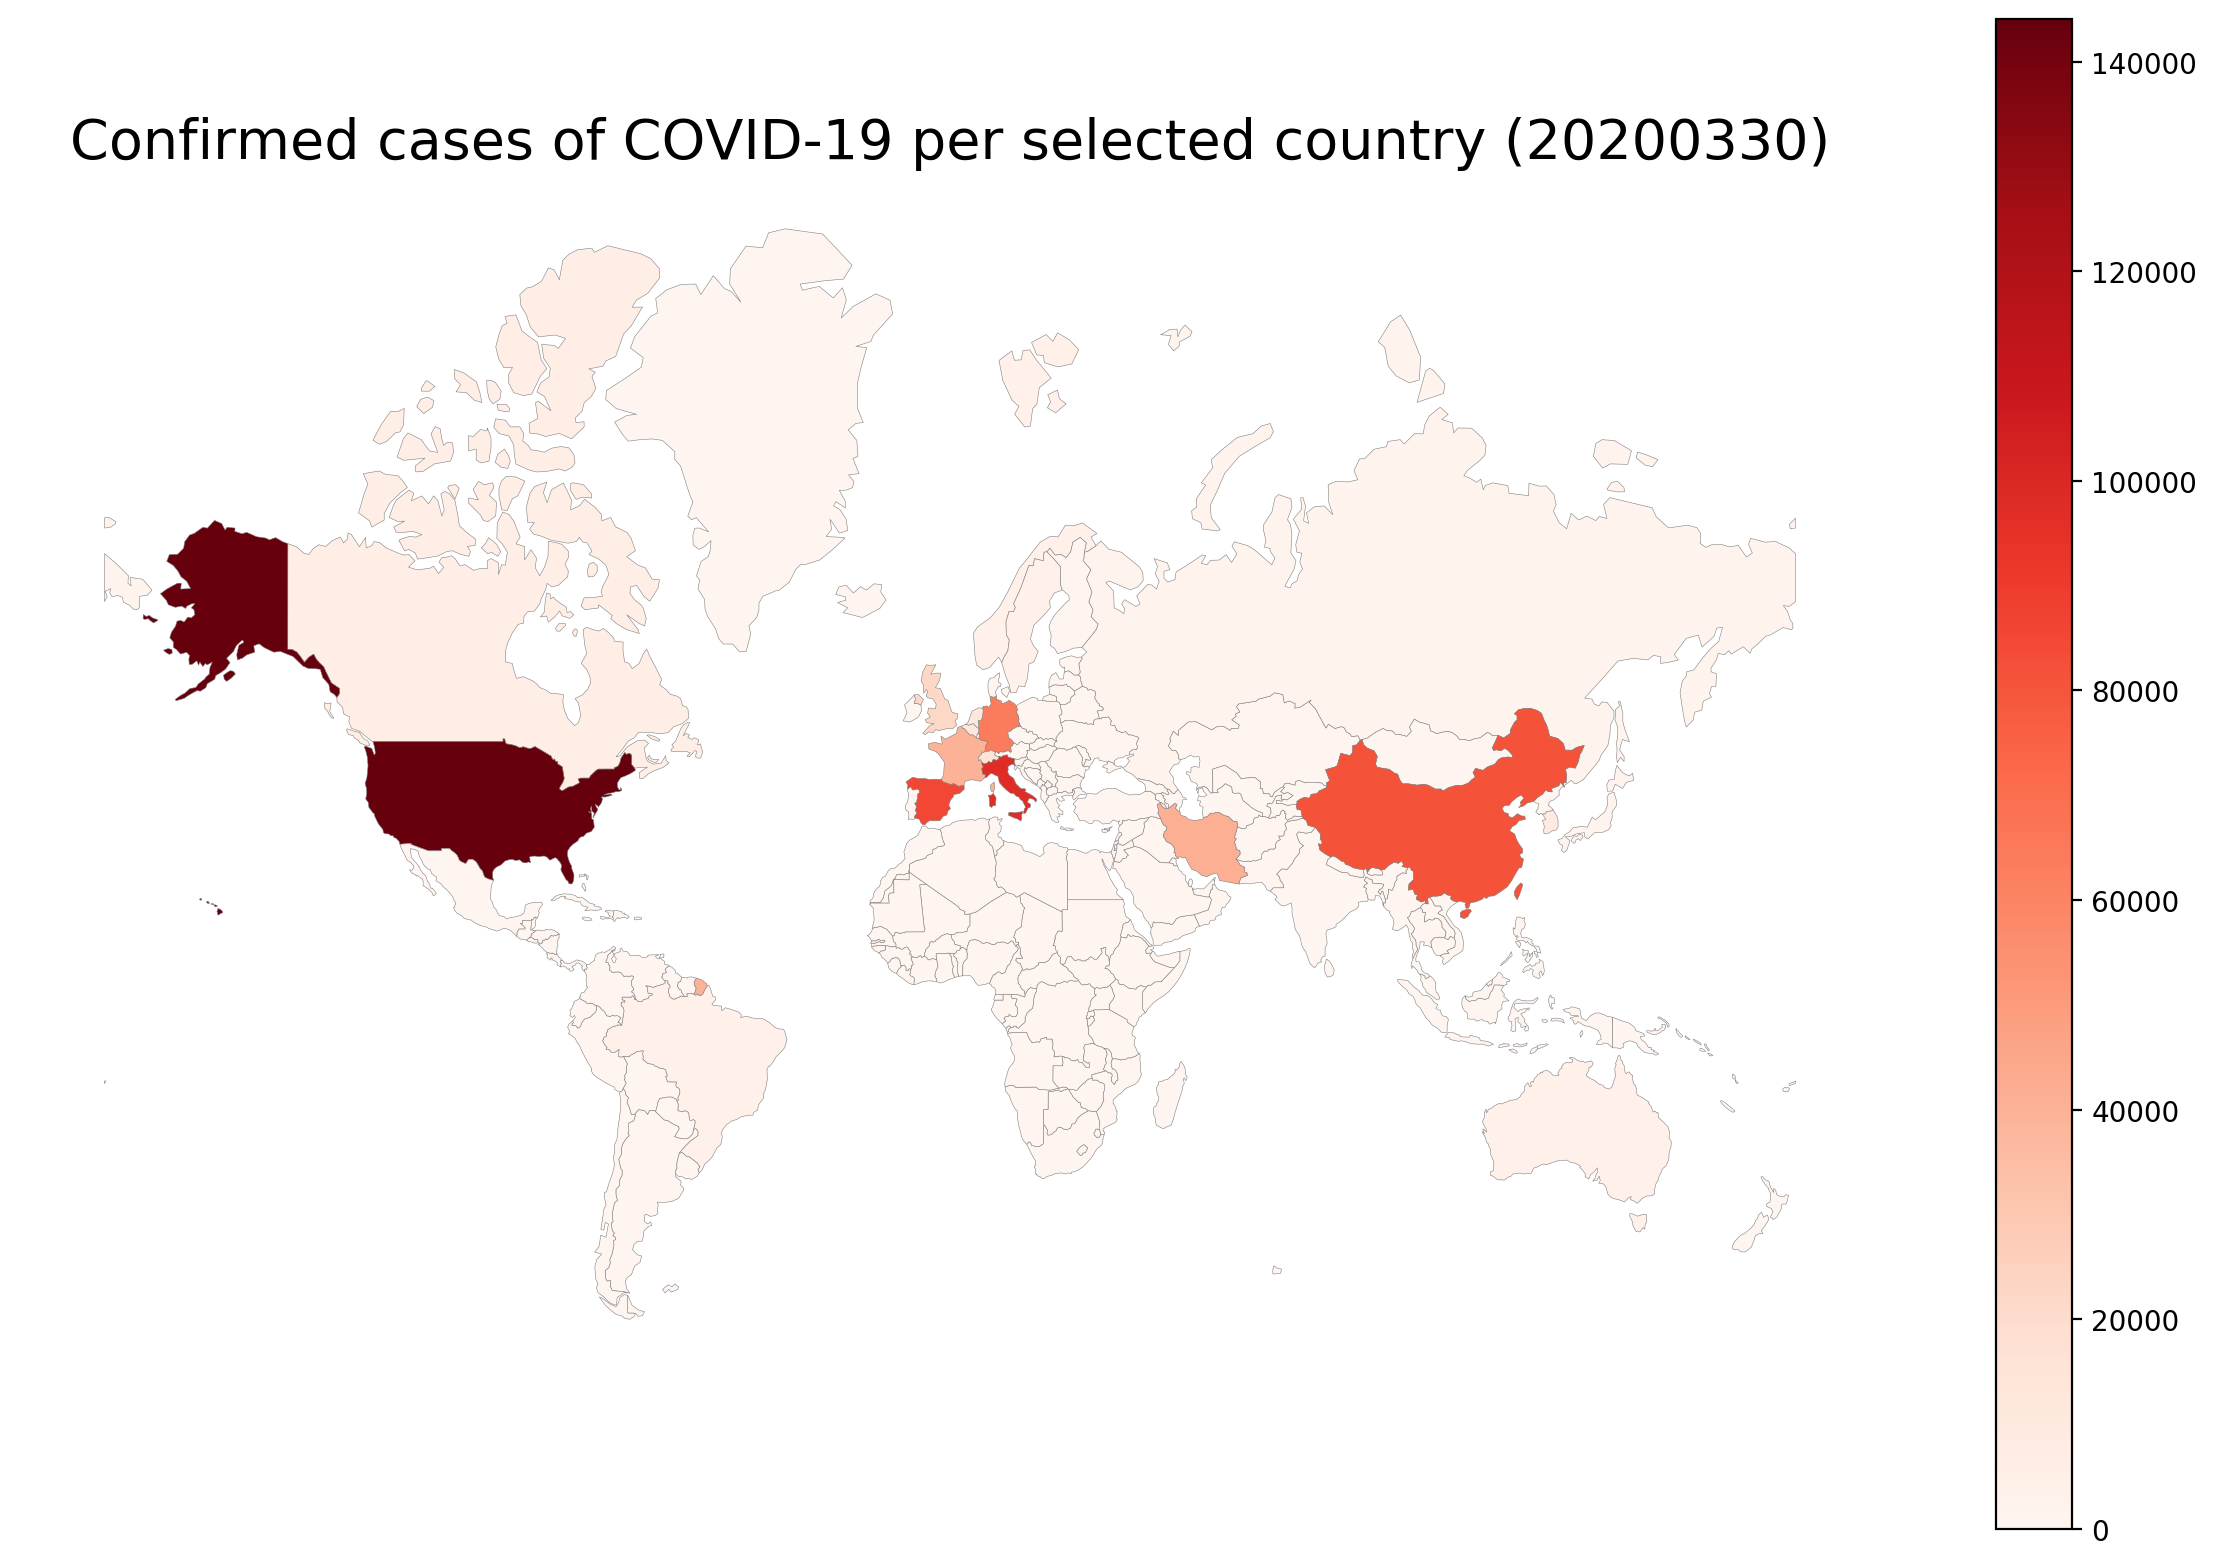

In [12]:
fig, ax = plt.subplots(figsize=(15, 10), dpi=200)
world.plot(ax=ax,
           linewidth=0.2, edgecolor='gray',
           column='number', cmap='Reds',
           legend=True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

ax.set_title(
    'Confirmed cases of COVID-19 per selected country (20200330)', size=20)